In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
xls = pd.ExcelFile('KPMG_VI_dataAsses.xlsx')

In [4]:
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic')

In [5]:
CustomerAddress = pd.read_excel(xls, 'CustomerAddress')

In [6]:
Transactions = pd.read_excel(xls, 'Transactions')

In [7]:
NewCustomerList = pd.read_excel(xls, 'NewCustomerList')

In [8]:
xls.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

# CustomerDemographic cleaning

In [9]:
CustomerDemographic.columns=CustomerDemographic.iloc[0]


In [10]:
 CustomerDemographic = CustomerDemographic.iloc[1:]

In [11]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [12]:
CustomerDemographic.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [13]:
customerDem = CustomerDemographic.dropna()

In [14]:
customerDem.isnull().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [15]:
customerDem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 1 to 3997
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          2630 non-null   object
 1   first_name                           2630 non-null   object
 2   last_name                            2630 non-null   object
 3   gender                               2630 non-null   object
 4   past_3_years_bike_related_purchases  2630 non-null   object
 5   DOB                                  2630 non-null   object
 6   job_title                            2630 non-null   object
 7   job_industry_category                2630 non-null   object
 8   wealth_segment                       2630 non-null   object
 9   deceased_indicator                   2630 non-null   object
 10  default                              2630 non-null   object
 11  owns_car                             2630 non-nu

In [16]:
customerDem['gender'].nunique()

4

In [17]:
customerDem['gender'].replace(['Female','Femal'], 'F', inplace=True)

C:\Users\ayven\AppData\Local\Temp\ipykernel_140540\4282867153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerDem['gender'].replace(['Female','Femal'], 'F', inplace=True)


In [18]:
customerDem['gender'].replace('Male', 'M', inplace=True)

C:\Users\ayven\AppData\Local\Temp\ipykernel_140540\268189275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerDem['gender'].replace('Male', 'M', inplace=True)


In [19]:
customerDem['gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
customerDem.drop('default', axis = 1, inplace = True)

C:\Users\ayven\AppData\Local\Temp\ipykernel_140540\1061989793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerDem.drop('default', axis = 1, inplace = True)


In [21]:
customerDem['tenure'].unique()

array([11, 16, 15, 8, 20, 6, 1, 21, 12, 19, 14, 4, 22, 18, 5, 17, 2, 7,
       13, 10, 3, 9], dtype=object)

In [22]:
customerDem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 1 to 3997
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          2630 non-null   object
 1   first_name                           2630 non-null   object
 2   last_name                            2630 non-null   object
 3   gender                               2630 non-null   object
 4   past_3_years_bike_related_purchases  2630 non-null   object
 5   DOB                                  2630 non-null   object
 6   job_title                            2630 non-null   object
 7   job_industry_category                2630 non-null   object
 8   wealth_segment                       2630 non-null   object
 9   deceased_indicator                   2630 non-null   object
 10  owns_car                             2630 non-null   object
 11  tenure                               2630 non-nu

# Customer Adress cleaning

In [23]:
CustomerAddress.columns= CustomerAddress.iloc[0]

In [24]:
CustomerAddress.drop(0, axis = 0, inplace= True)

In [25]:
CustomerAddress.reset_index(inplace=True)

In [26]:
CustomerAddress.drop('index', axis=1, inplace =True)

In [27]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [28]:
CustomerAddress['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [29]:
CustomerAddress.replace({'New South Wales':'NSW', 'Victoria':'VIC'}, inplace =True)

In [30]:
CustomerAddress['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [31]:
CustomerAddress['property_valuation'].unique()

array([10,  9,  4, 12,  8,  6,  7,  3,  5, 11,  1,  2], dtype=int64)

# Cleaning Transactions

In [32]:
Transactions.columns = Transactions.iloc[0]

In [33]:
Transactions.drop(0, axis=0, inplace=True)

In [34]:
Transactions.reset_index(inplace = True)

In [35]:
Transactions.drop('index', axis= 1, inplace =True)

In [36]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [37]:
Transactions.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [38]:
Transactions.dropna(inplace=True)

In [39]:
Transactions['transaction_id'].describe()

count     19445
unique    19445
top           1
freq          1
Name: transaction_id, dtype: int64

In [40]:
Transactions['product_id'].describe()

count     19445
unique      101
top           0
freq       1157
Name: product_id, dtype: int64

In [41]:
transact = Transactions.drop('product_first_sold_date', axis=1)

In [42]:
transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48



# searching  how much a customer spend 


In [43]:
#group by customer_ID and sum list price

transact2 = transact[['customer_id', 'list_price']].groupby('customer_id').sum()

In [44]:
transact2.reset_index(inplace = True)

In [45]:
transact2

,customer_id,list_price
0,1,9084.45
1,2,4149.07
2,3,9525.22
3,4,1047.72
4,5,5903.2
...,...,...
3487,3497,3744.07
3488,3498,5177.06
3489,3499,7673.48
3490,3500,4922.41


In [46]:
transact2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  3492 non-null   int64 
 1   list_price   3492 non-null   object
dtypes: int64(1), object(1)
memory usage: 54.7+ KB


# adding customer amount spent to costumer demographic table

In [47]:
df = pd.merge(customerDem, transact2, on='customer_id', how = 'inner')

In [48]:
df['list_price'].isnull().sum()

0

In [49]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,list_price
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,9084.45
1,2,Eli,Bockman,M,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,4149.07
2,3,Arlin,Dearle,M,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,9525.22
3,9,Mala,Lind,F,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,5357.55
4,10,Fiorenze,Birdall,F,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,5003.75


In [50]:
df2 = pd.merge(df, CustomerAddress, on = 'customer_id', how='inner')

In [51]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,list_price,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,9084.45,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,4149.07,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,F,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,5357.55,97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,M,58,1994-07-21 00:00:00,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8,6394.21,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,M,38,1955-02-15 00:00:00,Developer I,Financial Services,High Net Worth,N,Yes,8,7734.74,2 Sutherland Street,3799,VIC,Australia,6


# Which columns to keep
## drop: first and last name, Jobtitle, decease_ind, adress, post code, country{keep for context}
## change: DOB to age brackets

In [52]:
df2.drop(['first_name', 'last_name', 'address','job_title','deceased_indicator', 'postcode'], axis=1, inplace = True )

In [53]:
from datetime import datetime


In [54]:
currYear=datetime.now().year

In [55]:
currYear

2023

In [56]:
df2['DOB']=df2['DOB'].apply(lambda x: x.year)

In [57]:
df2['Age']=currYear-df2['DOB']

In [58]:
df2.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,list_price,state,country,property_valuation,Age
0,1,F,93,1953,Health,Mass Customer,Yes,11,9084.45,NSW,Australia,10,70
1,2,M,81,1980,Financial Services,Mass Customer,Yes,16,4149.07,NSW,Australia,10,43
2,9,F,97,1973,Argiculture,Affluent Customer,Yes,8,5357.55,NSW,Australia,12,50
3,12,M,58,1994,Manufacturing,Mass Customer,No,8,6394.21,QLD,Australia,4,29
4,13,M,38,1955,Financial Services,High Net Worth,Yes,8,7734.74,VIC,Australia,6,68


In [59]:
df2.drop('DOB', axis =1, inplace=True)

<Axes: >

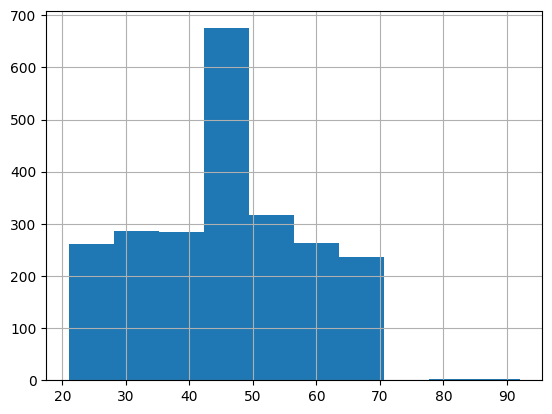

In [60]:
df2['Age'].hist()

In [61]:
df2['Age']  

0       70
1       43
2       50
3       29
4       68
        ..
2322    59
2323    25
2324    36
2325    37
2326    37
Name: Age, Length: 2327, dtype: int64

In [62]:
df2['Age'] = pd.cut(x=df2['Age'], bins=[19,29, 39, 49,59,69,79], labels=['20', '30', '40', '50','60','70'])

<Axes: xlabel='Age'>

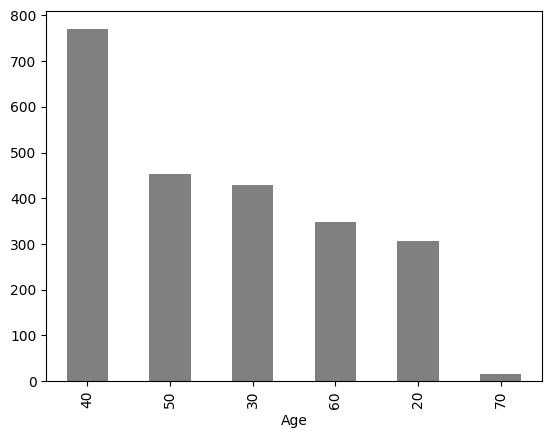

In [63]:
df2['Age'].value_counts().plot(kind='bar', color='gray')

In [64]:
df2.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,list_price,state,country,property_valuation,Age
0,1,F,93,Health,Mass Customer,Yes,11,9084.45,NSW,Australia,10,70
1,2,M,81,Financial Services,Mass Customer,Yes,16,4149.07,NSW,Australia,10,40
2,9,F,97,Argiculture,Affluent Customer,Yes,8,5357.55,NSW,Australia,12,50
3,12,M,58,Manufacturing,Mass Customer,No,8,6394.21,QLD,Australia,4,20
4,13,M,38,Financial Services,High Net Worth,Yes,8,7734.74,VIC,Australia,6,60


In [65]:
df2['list_price'].isnull().sum()

0

In [66]:
df2['list_price'].mean()

6181.24253545337

In [67]:
df2['list_price'].median()

5874.45

In [68]:
df2['list_price'].quantile(0.25)

4089.5150000000003

In [69]:
df2['list_price'].std()

2930.396080877352

# EDA Univariate

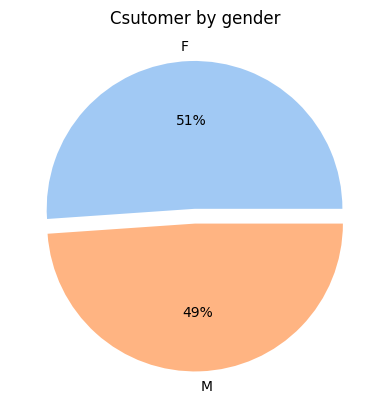

In [70]:
data =df2 ['gender'].value_counts()

# labels for data, replace with your own
keys = df2['gender'].unique()

# Declaring exploding pie
explode = [0.05, 0.05]

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
 explode=explode, autopct='%.0f%%')
 
# Add title to the chart
plt.title('Csutomer by gender')

# Displaying chart
plt.show() 

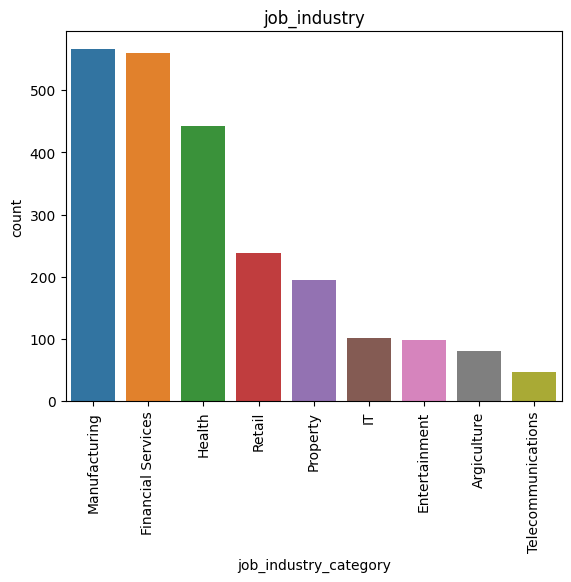

In [71]:
sns.countplot(x='job_industry_category',order=df2['job_industry_category'].
              value_counts(ascending=False).index, palette='tab10', data=df2)
plt.title('job_industry')
xticks=plt.xticks(rotation= 90)


<Axes: xlabel='list_price', ylabel='Count'>

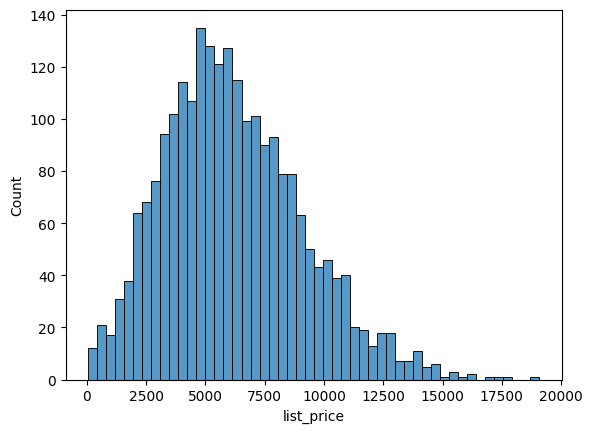

In [72]:
sns.histplot(df2['list_price'], bins=50)

## Base on this we can define a valuable customer as one who spent at least 2000 to be in the first quartile of the customers 

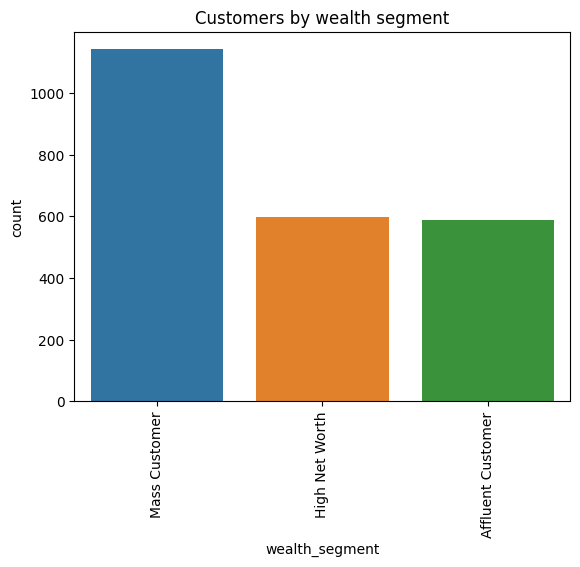

In [73]:
sns.countplot(x='wealth_segment',order=df2['wealth_segment'].
              value_counts(ascending=False).index, palette='tab10', data=df2)
plt.title('Customers by wealth segment')
xticks=plt.xticks(rotation= 90)

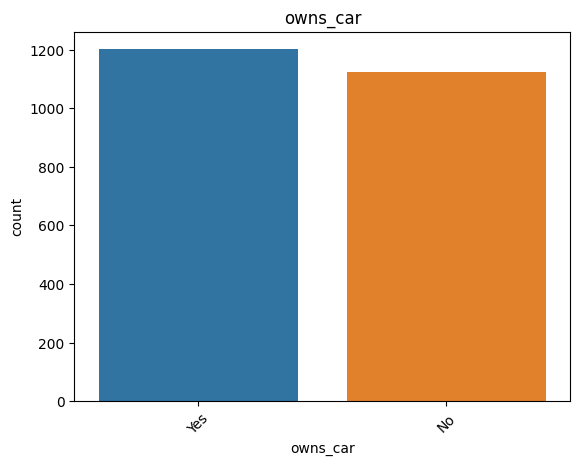

In [74]:
sns.countplot(x='owns_car',order=df2['owns_car'].
              value_counts(ascending=False).index, palette='tab10', data=df2)
plt.title('owns_car')
xticks=plt.xticks(rotation= 45)

<Axes: xlabel='tenure', ylabel='count'>

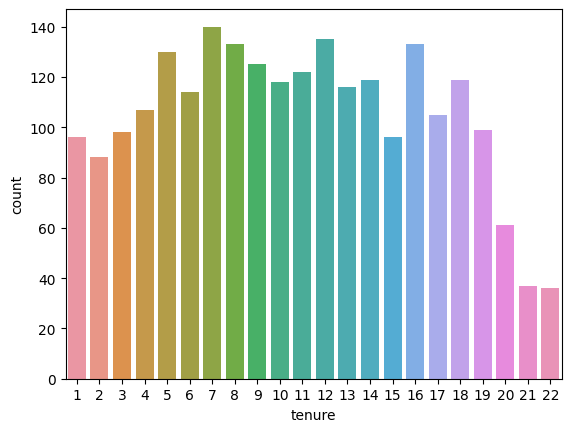

In [75]:
sns.countplot(x=df2['tenure'], data=df2)

In [76]:
df2.to_csv('C:\\Users\\ayven\\Downloads\\df2forTableauBI')

In [77]:
import os
os.getcwd()

'C:\\Users\\ayven\\Downloads'

# Bivariate Analysis

In [78]:
df2.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,list_price,state,country,property_valuation,Age
0,1,F,93,Health,Mass Customer,Yes,11,9084.45,NSW,Australia,10,70
1,2,M,81,Financial Services,Mass Customer,Yes,16,4149.07,NSW,Australia,10,40
2,9,F,97,Argiculture,Affluent Customer,Yes,8,5357.55,NSW,Australia,12,50
3,12,M,58,Manufacturing,Mass Customer,No,8,6394.21,QLD,Australia,4,20
4,13,M,38,Financial Services,High Net Worth,Yes,8,7734.74,VIC,Australia,6,60


<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='list_price'>

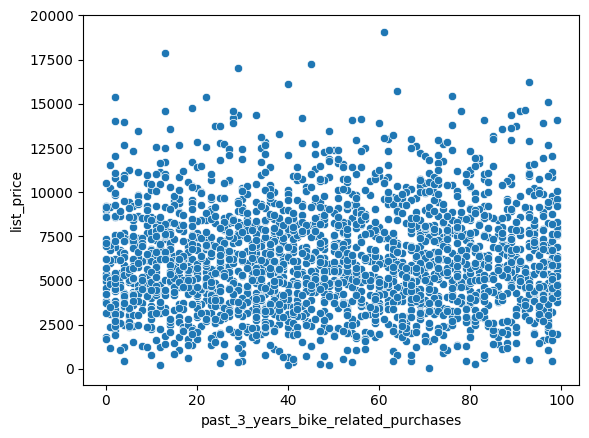

In [79]:
dataw=df2[[ 'past_3_years_bike_related_purchases', 'list_price']]

sns.scatterplot(dataw, x='past_3_years_bike_related_purchases', y='list_price')




<Axes: xlabel='Age'>

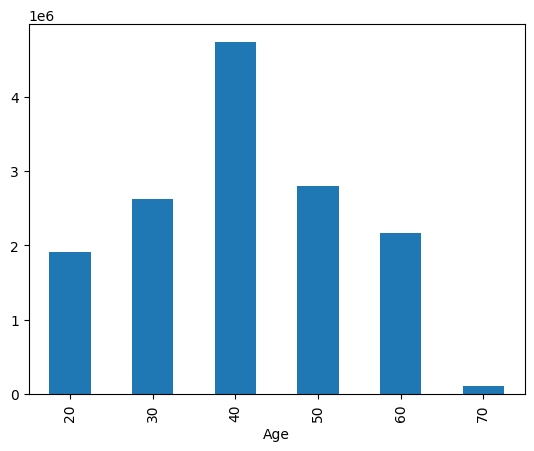

In [80]:
df_grp=df2[['list_price', 'Age']]
df_grp.groupby('Age')['list_price'].sum().plot(kind='bar')


<Axes: xlabel='owns_car'>

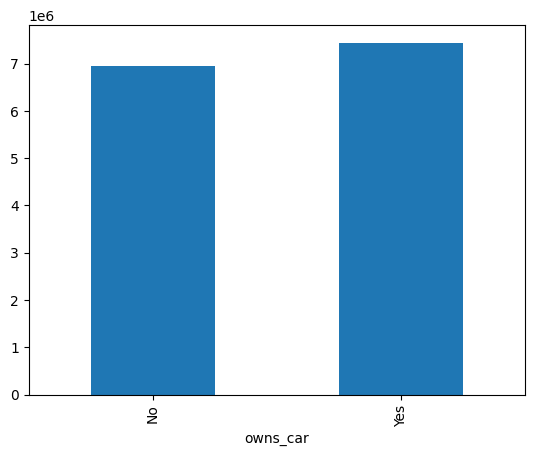

In [81]:
df_grpB=df2[['owns_car', 'list_price']]
df_grpB.groupby('owns_car')['list_price'].sum().plot(kind='bar')

Text(0.5, 1.0, 'purchases by Gender')

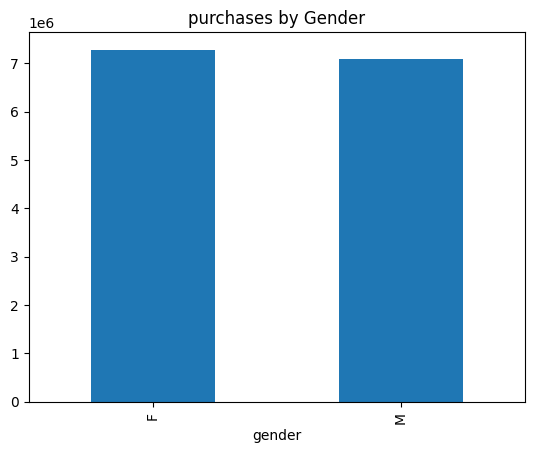

In [82]:
df_grpA=df2[['gender', 'list_price']]
df_grpA.groupby('gender')['list_price'].sum().plot(kind='bar')
plt.title('purchases by Gender')


<Axes: xlabel='state'>

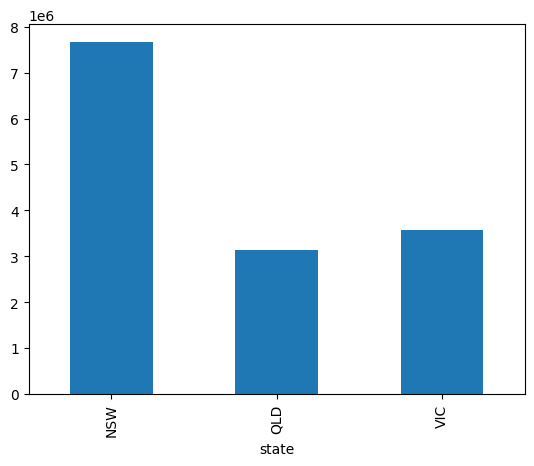

In [83]:
df_grp6=df2[['list_price', 'state']]
df_grp6.groupby('state')['list_price'].sum().plot(kind='bar')


<Axes: xlabel='property_valuation'>

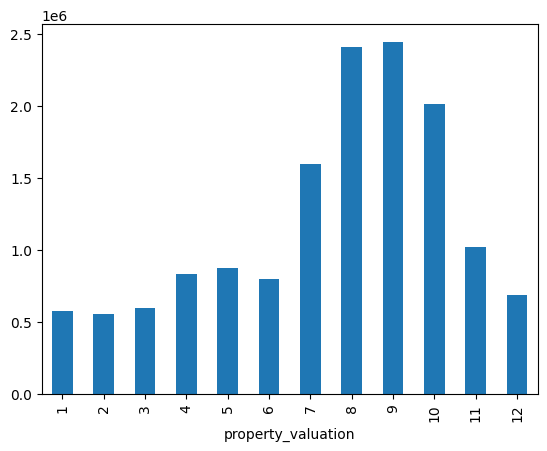

In [84]:
df_grp5=df2[['list_price', 'property_valuation']]
df_grp5.groupby('property_valuation')['list_price'].sum().plot(kind='bar')


<Axes: xlabel='tenure'>

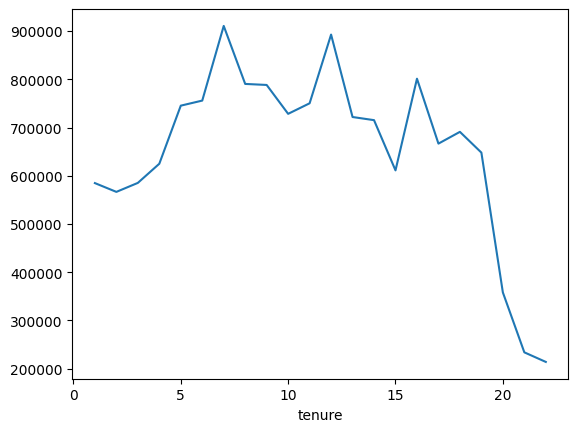

In [85]:
df_grp3=df2[['list_price', 'tenure']]
df_grp3.groupby('tenure')['list_price'].sum().plot()


<Axes: xlabel='wealth_segment'>

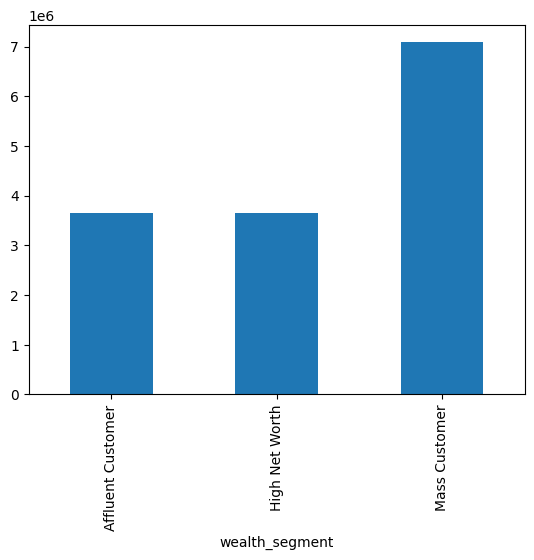

In [86]:
df_grp2=df2[['list_price', 'wealth_segment']]
df_grp2.groupby('wealth_segment')['list_price'].sum().plot(kind='bar')


 # New customer list cleaning

In [87]:
NewCustomerList.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.07,1.3375,1.337500,1.337500,4.0,4,1.703125


In [88]:
NewCustomerList.columns=NewCustomerList.iloc[0]

In [89]:
NewCustomerList.drop(0, axis=0, inplace =True)

In [90]:
NewCustomerList.reset_index(inplace= True)

In [91]:
NewCustomerList.drop('index', axis=1, inplace =True)

In [92]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.07,1.3375,1.337500,1.337500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.10,1.1000,1.375000,1.375000,4.0,4,1.703125


In [93]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                        

In [94]:
NewCustomerList.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
Rank                                     0
Value                                    0
dtype: in

# Which columns to keep
## drop: first and last name, Jobtitle, decease_ind, adress, post code, country{keep for context}
## change: DOB to age brackets

In [95]:
Newcust1=NewCustomerList.drop(['first_name','last_name','job_title', 'deceased_indicator','address','postcode', 'Rank', 'Value'], axis=1)

In [96]:
Newcust1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,Australia,11,0.49,0.4900,0.612500,0.520625,1.0
2,Female,10,1974-08-28 00:00:00,Financial Services,Affluent Customer,No,10,VIC,Australia,5,0.51,0.5100,0.510000,0.510000,1.0
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,QLD,Australia,1,1.07,1.3375,1.337500,1.337500,4.0
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,Australia,9,1.10,1.1000,1.375000,1.375000,4.0


In [97]:
Newcust1=Newcust1[['gender', 'past_3_years_bike_related_purchases','DOB',
                   'job_industry_category','wealth_segment','owns_car','tenure','state','country','property_valuation']]

In [98]:
Newcust1['DOB']=pd.to_datetime(Newcust1['DOB'])

In [99]:
Newcust1['DOB']=Newcust1['DOB'].apply(lambda x: x.year)

In [100]:
Newcust1['DOB']=currYear-Newcust1['DOB']

In [101]:
Newcust1['Age']=Newcust1['DOB']

In [102]:
Newcust1.drop('DOB',axis=1, inplace=True)

In [103]:
Newcust1.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,Australia,6,66.0
1,Male,69,Property,Mass Customer,No,16,NSW,Australia,11,53.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,Australia,5,49.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,Australia,1,44.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,Australia,9,58.0


In [104]:
Newcust1['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [105]:
Newcust1[Newcust1['gender']=='U'].count()

0
gender                                 17
past_3_years_bike_related_purchases    17
job_industry_category                  17
wealth_segment                         17
owns_car                               17
tenure                                 17
state                                  17
country                                17
property_valuation                     17
Age                                     0
dtype: int64

In [106]:
Newcust1['gender'].replace('U','Female', inplace=True)

In [107]:
Newcust1['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [108]:
Newcust1.replace({'Male':'M', 'Female':'F'}, inplace =True)

In [109]:
Newcust1['Age']=pd.cut(x=Newcust1['Age'], bins=[19,29, 39, 49,59,69,79], labels=['20', '30', '40', '50','60','70'])

In [110]:
Newcust1.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Age
0,M,86,Manufacturing,Mass Customer,Yes,14,QLD,Australia,6,60
1,M,69,Property,Mass Customer,No,16,NSW,Australia,11,50
2,F,10,Financial Services,Affluent Customer,No,10,VIC,Australia,5,40
3,F,64,Manufacturing,Affluent Customer,Yes,5,QLD,Australia,1,40
4,F,34,Financial Services,Affluent Customer,No,19,NSW,Australia,9,50



# MODELLING

In [111]:
df2.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,list_price,state,country,property_valuation,Age
0,1,F,93,Health,Mass Customer,Yes,11,9084.45,NSW,Australia,10,70
1,2,M,81,Financial Services,Mass Customer,Yes,16,4149.07,NSW,Australia,10,40
2,9,F,97,Argiculture,Affluent Customer,Yes,8,5357.55,NSW,Australia,12,50
3,12,M,58,Manufacturing,Mass Customer,No,8,6394.21,QLD,Australia,4,20
4,13,M,38,Financial Services,High Net Worth,Yes,8,7734.74,VIC,Australia,6,60


In [112]:
df2.replace({'20s':20, '30s':30,'40s':40,'50s':50,'60s':60,'70s':70}, inplace=True)

In [113]:
Newcust1.isnull().sum()

0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
country                                  0
property_valuation                       0
Age                                     79
dtype: int64

In [114]:
Newcust1['job_industry_category'].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [115]:
Newcust1['Age'].fillna('40', inplace=True)

In [116]:
Newcust1['Age'].unique()

['60', '50', '40', '70', '30', '20']
Categories (6, object): ['20' < '30' < '40' < '50' < '60' < '70']

In [117]:
df2['Age'].isnull().sum()

3

In [118]:
df2['Age'].dropna(inplace=True)

In [119]:
Newcust1['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [120]:
Newcust1.isnull().sum()

0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
country                                  0
property_valuation                       0
Age                                      0
dtype: int64

In [121]:
kndf=pd.DataFrame(Newcust1['job_industry_category'])

# K_nearest Neighbor imputer

In [122]:
from sklearn.impute import KNNImputer

In [123]:
kndf['job_industry_category']=kndf.job_industry_category.map({'Manufacturing':1, 'Property':2, 'Financial Services':3, 'Entertainment':9,
       'Retail':4, 'IT':5, 'Telecommunications':6, 'Health':7, 'Argiculture':8})

In [124]:
kndf.head()

,job_industry_category
0,1.0
1,2.0
2,3.0
3,1.0
4,3.0


In [125]:
kndf.isnull().sum()

job_industry_category    165
dtype: int64

In [126]:
imputer=KNNImputer(n_neighbors = 9)

In [127]:
kndf_filled=imputer.fit_transform(kndf)

In [128]:
kndf=pd.DataFrame(kndf_filled)

In [129]:
kndf.isnull().sum()

0    0
dtype: int64

In [130]:
kndf.columns=['job_industry_category']

In [131]:
kndf

,job_industry_category
0,1.0
1,2.0
2,3.0
3,1.0
4,3.0
...,...
995,3.0
996,7.0
997,3.0
998,3.0


In [132]:
Newcust_model=Newcust1

In [133]:
Newcust_model['job_industry_category']=kndf['job_industry_category']

In [134]:
Newcust_model.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Age
0,M,86,1.0,Mass Customer,Yes,14,QLD,Australia,6,60
1,M,69,2.0,Mass Customer,No,16,NSW,Australia,11,50
2,F,10,3.0,Affluent Customer,No,10,VIC,Australia,5,40
3,F,64,1.0,Affluent Customer,Yes,5,QLD,Australia,1,40
4,F,34,3.0,Affluent Customer,No,19,NSW,Australia,9,50


In [135]:
Newcust_model.isnull().sum()

0
gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
country                                0
property_valuation                     0
Age                                    0
dtype: int64

In [136]:
df2_model=df2


In [137]:
df2_model.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,list_price,state,country,property_valuation,Age
0,1,F,93,Health,Mass Customer,Yes,11,9084.45,NSW,Australia,10,70
1,2,M,81,Financial Services,Mass Customer,Yes,16,4149.07,NSW,Australia,10,40
2,9,F,97,Argiculture,Affluent Customer,Yes,8,5357.55,NSW,Australia,12,50
3,12,M,58,Manufacturing,Mass Customer,No,8,6394.21,QLD,Australia,4,20
4,13,M,38,Financial Services,High Net Worth,Yes,8,7734.74,VIC,Australia,6,60


In [138]:
Newcust_model.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Age
0,M,86,1.0,Mass Customer,Yes,14,QLD,Australia,6,60
1,M,69,2.0,Mass Customer,No,16,NSW,Australia,11,50
2,F,10,3.0,Affluent Customer,No,10,VIC,Australia,5,40
3,F,64,1.0,Affluent Customer,Yes,5,QLD,Australia,1,40
4,F,34,3.0,Affluent Customer,No,19,NSW,Australia,9,50
